### Initially, the comments were written in Russian. Translated by Google Translator

### Изначально комментарии были написаны на русском языке. Переведены через Google-переводчик

# Task:
Collect data on the number, sources and time of bot activity on the site via the Yandex Metrica API.

# Задача:
Собрать данные по количеству, источникам и времени активности ботов на сайте через API Яндекс метрики.

In [1]:
# import the necessary tools
# импортируем нужные инструменты
import pandas as pd
import json 
import requests
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# we collect data: the number of visits, the percentage of robots from the number of all visitors and the source of traffic
# собираем данные: количество визитов, процент роботов от количества всех посетителей и источник трафика
token='AQAAAAAaRuwjAAdk9yp6ABFXrUeZi1HCEiS1VRc'
headers = {'Authorization': 'OAuth ' + token}

params = {'metrics': 'ym:s:visits,ym:s:robotPercentage',
          'dimensions':'ym:s:lastSignSearchEngine',
          'date1': '2020-09-01',  
          'date2': '2020-09-30',     
          'ids': 30177909,
          'accuracy':'full',
          'limit':100000}

response = requests.get('https://api-metrika.yandex.net/stat/v1/data', params=params, headers=headers)
print (response.status_code)

metrika_data=response.json()

200


In [3]:
# writing a function that converts the received jso- file into a list of dictionaries to create a dataframe
# пишем функцию которая конвертирует полученный json-файл в список словарей, для создания датафрейма
def get_list_of_dicts(metrika_data):
    list_of_dicts = []
    dimensions_list = metrika_data['query']['dimensions']
    metrics_list = metrika_data['query']['metrics']
    for data_item in metrika_data['data']:
        d = {}
        for i,dimension in enumerate(data_item['dimensions']):
            d[dimensions_list[i]] = dimension['name']
        for i,metric in enumerate(data_item['metrics']):
            d[metrics_list[i]] = metric
        list_of_dicts.append(d)
    return list_of_dicts

In [4]:
# form a dataframe based on the resulting list of dictionaries
# формируем датафрейм на основе получившегося списка словарей
robot_visits_percent_df = pd.DataFrame(get_list_of_dicts(metrika_data))
# giving the columns clear values
# даём столбцам понятные значения
robot_visits_percent_df.columns=['source','visits_count','percent_bots']

In [5]:
# requesting data on the time of the visit and the percentage of bots
# запрашиваем данные по времени визита и проценту ботов
token='AQAAAAAaRuwjAAdk9yp6ABFXrUeZi1HCEiS1VRc'
headers = {'Authorization': 'OAuth ' + token}

params = {'metrics': 'ym:s:visits',
          'dimensions': 'ym:s:isRobot,ym:s:hour',  
          'date1': '2020-09-01',  
          'date2': '2020-09-30',     
          'ids': 30177909,
          'accuracy':'full',
          'limit':100000}

response = requests.get('https://api-metrika.yandex.net/stat/v1/data', params=params, headers=headers)
print (response.status_code)

metrika_data_1=response.json()

200


In [6]:
# convert data and rename columns
# преобразуем данные и переименовываем колонки
time_visit_df=pd.DataFrame(get_list_of_dicts(metrika_data_1))
time_visit_df.columns=['type','time_hour','visits_count']
# check the correctness of the received data
# проверяем корректность полученных данных
time_visit_df.head(5)

,type,time_hour,visits_count
0,People,16:00,235.0
1,People,12:00,228.0
2,People,14:00,226.0
3,People,15:00,226.0
4,People,11:00,212.0


In [7]:
# creating a dataframe with bots only
#создаём датафрейм только с ботами
robot_time_visit_df=time_visit_df.query('type=="Robots"')

'Процент ботов от общего числа посететилей по источникам:'

,source,visits_count,percent_bots
0,"Google, search results",2471.0,25.738567
1,"Yandex, search results",804.0,12.437811
2,Yandex Mobile,47.0,0.000000
3,Yandex: mobile app,5.0,0.000000
4,DuckDuckGo,4.0,75.000000
5,Google: mobile app,3.0,0.000000


<AxesSubplot:title={'center':'Количество посетителей ботов в разбивке по часам'}, xlabel='time_hour'>

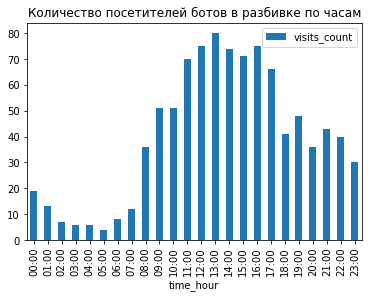

In [8]:
display('Процент ботов от общего числа посететилей по источникам:', robot_visits_percent_df)
display(robot_time_visit_df.groupby('time_hour').sum().plot(kind = 'bar', title = 'Количество посетителей ботов в разбивке по часам'))

# Output:



All automated queries (bots) come from search engines (Google, Yandex, DuckDuckGo) during working hours from 9 to 17 hours. Most of the requests presumably come from office work programs and search engine data aggregators.

# Вывод:

Все автоматезированые запросы (боты) приходят от поисковых систем (Google, Yandex, DuckDuckGo) в рабочее время с 9и до 17и часов. Большенство запросов предположительно исходит от офисных рабочих программ и агрегаторов данных поисковиков.